In [218]:
#pip install geopandas
#pip install matplotlib

In [219]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from shapely import LineString, MultiPoint, voronoi_polygons

Charger la carte

In [289]:
carte = gpd.read_file("../docs/map_senegal_shp/Limite_D‚partement.shp").to_crs(epsg=4326)

Charger des données d'antennes

number of elements 826


<Axes: >

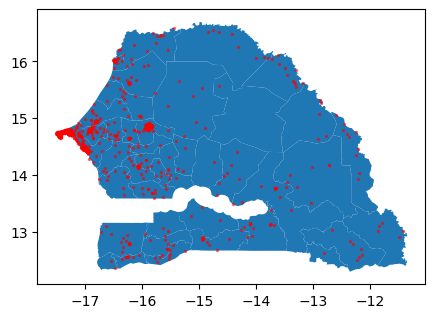

In [293]:
df = pd.read_csv("../data/antennes/antennes.csv")
points = MultiPoint(df[['longitude', 'latitude']].values)
df_points = gpd.GeoDataFrame(geometry=[point for point in list(points.geoms)])
df_points = df_points.drop_duplicates()
print("number of elements", len(df_points))
ax = carte.plot(figsize=(5,5))
df_points.plot(ax=ax, color = "red", markersize=2, alpha=0.5)

Calculer les voronois

<Axes: >

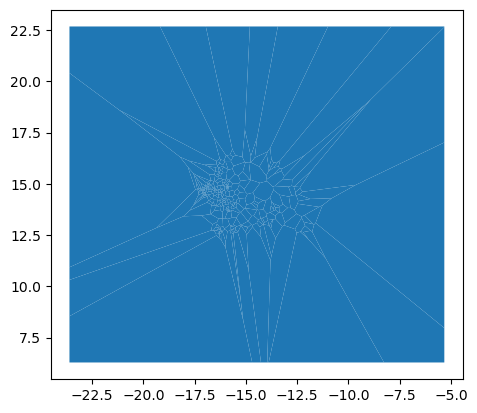

In [303]:
country_points = shapely.intersection(points, carte.unary_union.convex_hull)

vor_polygons = voronoi_polygons(country_points, 
                                extend_to = carte.unary_union.convex_hull,
                                tolerance=0.1)
vor = gpd.GeoDataFrame(geometry=[i for i in vor_polygons.geoms])
vor.plot()

Afficher le calcul

<Axes: >

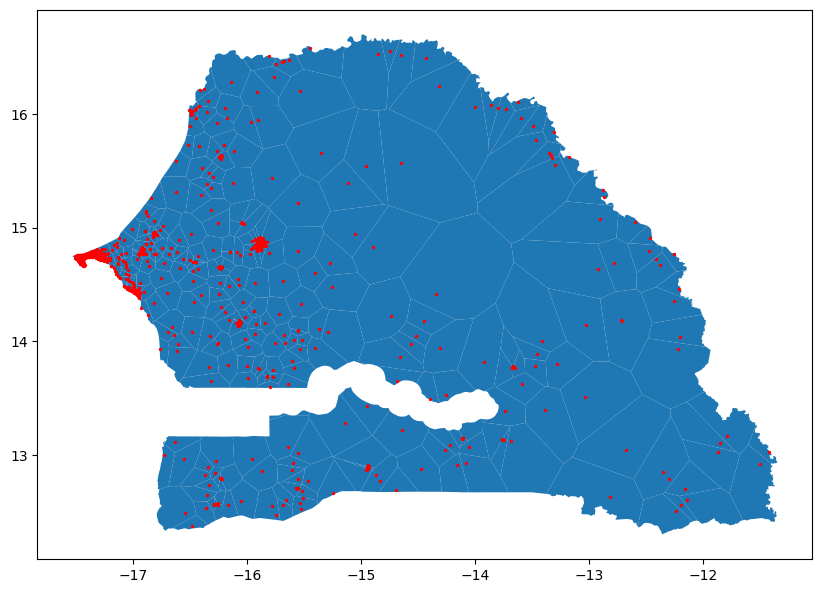

In [305]:
vor = shapely.intersection(vor, carte.unary_union)
ax = vor.plot(figsize=(10,10))
df_points.plot(ax=ax, color = "red", markersize=2, alpha=1)